# Image Steganography

---

## Project Objective:
Implement and analyze performance of various image steganography algorithms including LSB, F5, and Deep Learning techniques. The evaluation of processed images will be contingent upon imperceptibility. The unperceivable or undetected change in the image after encrypting and embedding the secret message. The metrics are defined as Robustness, Mean Square Error (MSE), Peak Signal to Noise Ratio (PSNR), Normalized Cross Correlation (NCC), and Structured Similarity Index Measure (SSIM).


## Steganographic Process

Image steganography is the process of concealing secret information in an image in which is not visible to the human eye. The sender begins with the secret message, a secret key, and an image of their choosing to undergo an encoding process to produce an image nearly identical to it. The reciever will be able to retrieve the embedding secret message upon supplying the sent image with the corresponding key.

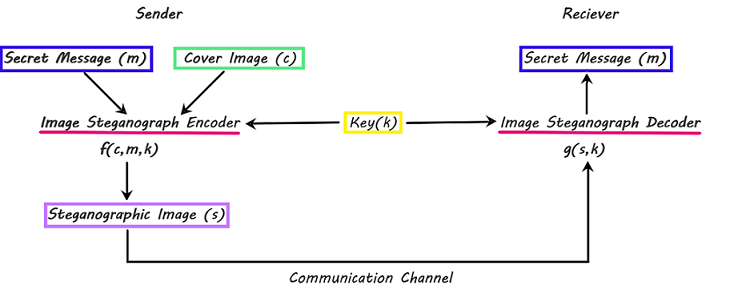

# Import Libraries 

In [ ]:
pip install pycrypto

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image, ImageOps
import math
#from Crypto.Cipher import AES
import base64
import random

# Load Data 

In [2]:
hydrangea = np.array(Image.open('Hydrangea.jpg'))
silo = np.array(Image.open('Silo.jpg'))
glass = np.array(Image.open('Stained_Glass.jpg'))

# Metrics 

## Robustness 
The ability of the embedded data to remain intact undergoing transformations, filtering, sharpening, blurring, added random noise, rotations,scaling, cropping, and lossy compression.

**Goal:** the entropy between probability distribution of the cover and altered steganographic image is smaller than ℇ. This will befine whether it is ℇ-secure or not.

$$D(PD_c//PD_s) = \sum \left[PD_c\log\left(\dfrac{PD_c}{PD_s}\right) \right] \le ℇ$$



*   ℇ denotes the message space
*   $PD_c$ denotes the Probability Distribution of the cover image
*   $PD_s$ denotes the Probability Distribution of the steganographic image




## Mean Square Error
The average squared difference between original image and altered steganographic image.

**Goal:** lower MSE indicates lower error between hidden image and cover image

$$MSE = \dfrac{1}{mn}\sum\limits_{i = 0}^{m-1}\sum\limits_{j = 0}^{n-1}\left[C(i,j)-S(i,j)\right]^2$$

*  _m_ denotes image rows
*  _n_ denotes image columns
*  _C(i,j)_ denotes pixel value of original cover image
*  _S(i,j)_ denotes pixel value of steganographic image 



In [ ]:
#inputs are np.array represenatyion of an images 
def MSE(cover, stegano):
  MSE = np.square((cover - stegano)).mean()
  return MSE 

##  PSNR - Peak Signal to Noise Ratio 
The ratio between maximum power of a signal and the power of corrupting noise regarding the quality of the compressed steganographic image compared to the origial.

**Goal:** high PSNR value indicates greater similarities of the steganographic image compared to the original. Imperceptibilty is achieve if PSNR is above 36 dB

$$PSNR = 20\log_{10}\left(\dfrac{MAX_c} {\sqrt{MSE}}\right)$$

*  $MAX_c$ denotes maximum possible pixel value of the original cover image
*   _MSE_ denotes Mean Square Error




In [ ]:
def PSNR(MSE):
  if MSE == 0:
    #There is no noise 
    return 100
  PSNR = 20 * math.log10(255 / math.sqrt(MSE))
  return PSNR 

## NCC - Normalized Cost Correlation 
Evaluates degree of closeness between the cover image and steganographic image.

**Goal:** A value closer to 1 indicates the images higher similarity.

$$NCC = \dfrac{\sum\limits_{i = 1}^{m}\sum\limits_{j = 1}^{n}C(i,j)* S(i,j)}{\sum\limits_{i = 1}^{m}\sum\limits_{j = 1}^{n}C(i,j)^2}$$

*  _m_ denotes image rows
*  _n_ denotes image columns
*  _C(i,j)_ denotes pixel value of original image
*  _S(i,j)_ denotes pixel value of steganographic image 


In [ ]:
def NCC(cover, stegano):
  NCC = (cover * stegano).sum() / np.square(cover).sum()
  return NCC

## SSIM - Structured Similarity Index Measure
Evaluates level of structural simiarity between cover image and steganpgraphic image. 

**Goal:** greater values closer to 1 represent higher similarities 

$$SSIM = \dfrac{(2μ_cμ_s + c_1)(2σ_{cs}+c_2)}{(μ_c^2μ_s^2 + c_1)(σ_c^2+σ_s^2+c_2)}$$


* c denotes the cover image
* s denotes the steganographic image
*   μ denotes pixel sample mean of c, s respectively 
*   σ denotes the variance of c, s respectively
* $σ_{cs}$ denotes the covariance of c and s
* $σ^2$ denotes the mean variance of c, s respectively 
* $c_1, c_2$ denotes varibales to stabilize division in weak denominator events




In [ ]:
def SSIM(cover, stegano):
  c_mu = cover.mean()
  s_mu = stegano.mean()
  c_var = np.square(np.var(cover))
  s_var = np.square(np.var(stegano))
  cs_covar = np.cov(cover, stegano)
  c1 = (0.01 * 255)**2
  c2 = (0.03 * 255)**2
  numerator = (2 * c_mu * s_mu + c1) * (2 * + c2 )
  denominator = ((np.square(c_mu) * np.square(s_mu)) + c1)  * (c_var + s_var + c2)
  SSIM = numerator / denominator
  return SSIM

# LSB - Least Significant Bit 
 LSB Steganography is a spatial domain technique in which the secret message will be embedded by altering the right most bits of the RBG pixels that make up the image data. By modifying only the least significants bits, we will achieve minimal impact in the overall apearance of the image. 
 
Spatial domain methods directly alter the pixel data to conceal the hidden message. 




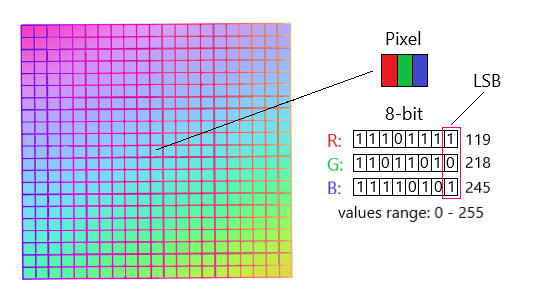

**AES Encryption based LSB Algorithm**

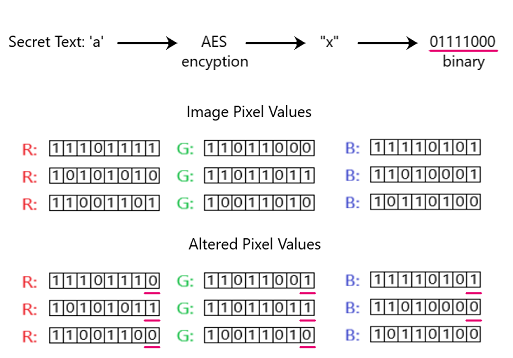

## Helper Functions

Convert secret message to binary string representation
> **Input:**    
secret - String   

> **Output:**    
binarySecrets - string made up of binary representation for each character of the inputted string 

In [ ]:
def msgToBinary(secret):
  binarySecrets = []
  for ch in secret:
    charToBinary = "{:08b}".format(ord(ch))
    binarySecrets.append(charToBinary)
  return "".join(binarySecrets)

Convert list of secret binary strings to secret message   
> **Input:**     
binarySecrets - List of string binary representations 

> **Output:**      
secret - String

In [ ]:
def binaryToMsg(binarySecrets):
  secret = []
  for binaryStr in binarySecrets:
    secret.append(chr(int(binaryStr, 2)))
  return "".join(secret)

## Encryption

Embed secret key-encrypted message in the given image using the LSB method
> **Input:**     
secret - String   
cover - Image  
key - String with value of 128, 192, or 256 bits long

> **Output:**    
stegano - LSB Steganographic Image 

In [ ]:
def LSB_encrypt(secret, cover, key):
  #pad key, length must be of multiples of 16
  secret += (16 - len(secret) % 16) * " "
  cipher = AES.new(bytes(key, 'utf-8'),  AES.MODE_ECB)
  encryptedMsg = base64.b64encode(cipher.encrypt(secret))

  binary = msgToBinary(encryptedMsg.decode("ascii") + "$+0p")
  # $+0p will serve as our delimiter value used in decrypting

  stegano = cover.copy()
  i, j, b = 0, 0, 0
  while(b < len(binary)):
    pixels = stegano[i][j]
    for rgb in range(0,3):
      if b < len(binary):
        msgVal = binary[b]
        binary_value = "{0:b}".format(pixels[rgb])
        changeBit = binary_value[:-1] + msgVal
        stegano[i][j][rgb] = int(changeBit, 2)
        b += 1
    i += 1
    j += 1

  return stegano

## Decryption

Retrieve secret key-decrypted message in the given LSB Steganograph image 
> **Input:**       
stegano - LSB Steganographic Image     
key - String with value of 128, 192, or 256 bits long

> **Output:**    
secret - String  

In [ ]:
def LSB_decrypt(stegano, key):
  delimiter = "$+0p"
  i, j = 0, 0
  stop = False
  curBinaryVal = []
  binarySecrets = []
  while(not stop):
    pixels = stegano[i][j]
    for value in pixels:

      if len(curBinaryVal) >= 8:
        binaryChar = "".join(curBinaryVal)
        if len(binarySecrets) >= 4 and binaryToMsg(binarySecrets[-4:]) == delimiter:
          stop = True
          binarySecrets = binarySecrets[:-4]
          break
        else:
          binarySecrets.append(binaryChar)
          curBinaryVal = []
      
      curBinaryVal.append("0" if value % 2 == 0 else "1")

    i += 1
    j += 1
  secret = binaryToMsg(binarySecrets)
  msg = base64.b64decode(bytes(secret, 'utf-8'))
  cipher = AES.new(bytes(key, 'utf-8'),  AES.MODE_ECB)
  decryptedMsg = cipher.decrypt(msg).rstrip()
  
  return decryptedMsg.decode("ascii")

## Visualization

### Image 1

Encrypt secret message in cover image 

In [ ]:
key = "0123456789012345"
secret_msg = "Fun fact: Every 39 seconds there is a cyber attack, 75% of cyber attacks start with an email, Since COVID-19 and the increase in staff working from home, the FBI have reported an increase of 300% in reported cybercrimes"

In [ ]:
hydrangea_LSB = LSB_encrypt(secret_msg, hydrangea, key)

Cover image and Steganographic image visual comparison

Text(0.5, 1.0, 'Steganographic Image')

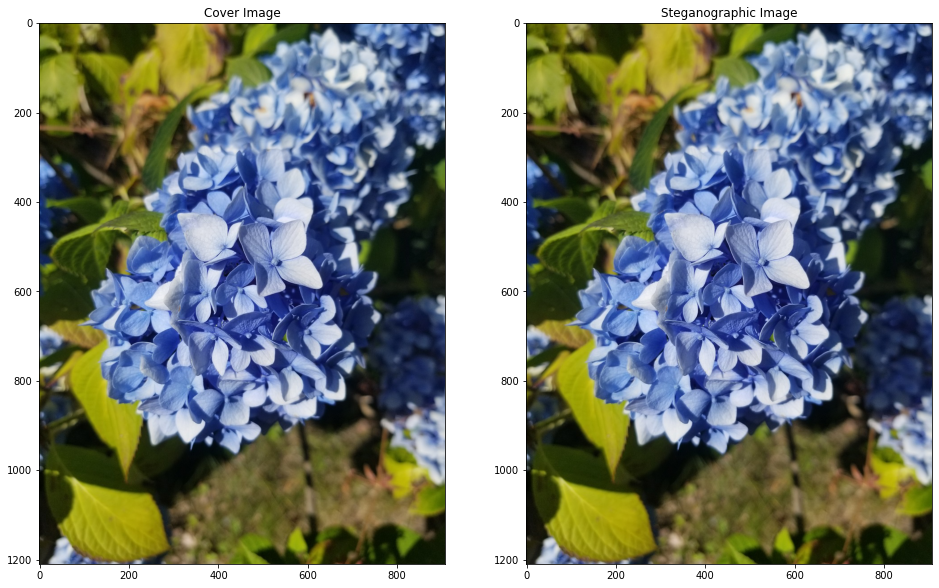

In [ ]:
fig = plt.figure(figsize=(16, 16))

fig.add_subplot(1, 2, 1)
plt.imshow(hydrangea)
plt.title("Cover Image")

fig.add_subplot(1, 2, 2)
plt.imshow(hydrangea_LSB)
plt.title("Steganographic Image")

Decrypt secret message from Steganographic Image 

In [ ]:
print(LSB_decrypt(hydrangea_LSB, key))

Fun fact: Every 39 seconds there is a cyber attack, 75% of cyber attacks start with an email, Since COVID-19 and the increase in staff working from home, the FBI have reported an increase of 300% in reported cybercrimes


### Image 2

Encrypt secret message in cover image 

In [ ]:
key = "0123456789012345"
secret_msg = "Vanderbilt University: Together we excel Acquire knowledge, not debt An immersive academic community The faculty attention you deserve The heart of Nashville Happy you're here"

In [ ]:
silo_LSB = LSB_encrypt(secret_msg, silo, key)

Cover image and Steganographic image visual comparison

Text(0.5, 1.0, 'Steganographic Image')

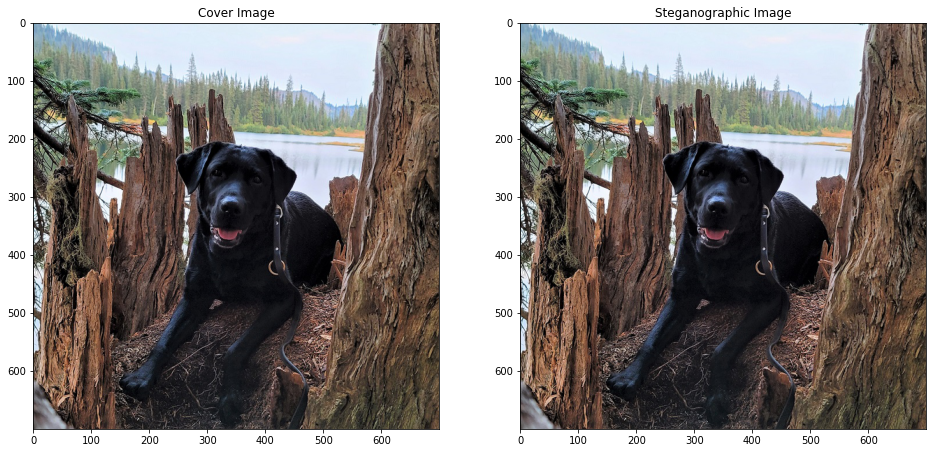

In [ ]:
fig = plt.figure(figsize=(16, 16))

fig.add_subplot(1, 2, 1)
plt.imshow(silo)
plt.title("Cover Image")

fig.add_subplot(1, 2, 2)
plt.imshow(silo_LSB)
plt.title("Steganographic Image")

Decrypt secret message from Steganographic Image 

In [ ]:
print(LSB_decrypt(silo_LSB, key))

Vanderbilt University: Together we excel Acquire knowledge, not debt An immersive academic community The faculty attention you deserve The heart of Nashville Happy you're here


### Image 3

Encrypt secret message in cover image 

In [ ]:
key = "0123456789012345"
secret_msg = "Vanderbilt University"

In [ ]:
glass_LSB = LSB_encrypt(secret_msg, glass, key)

Cover image and Steganographic image visual comparison

Text(0.5, 1.0, 'Steganographic Image')

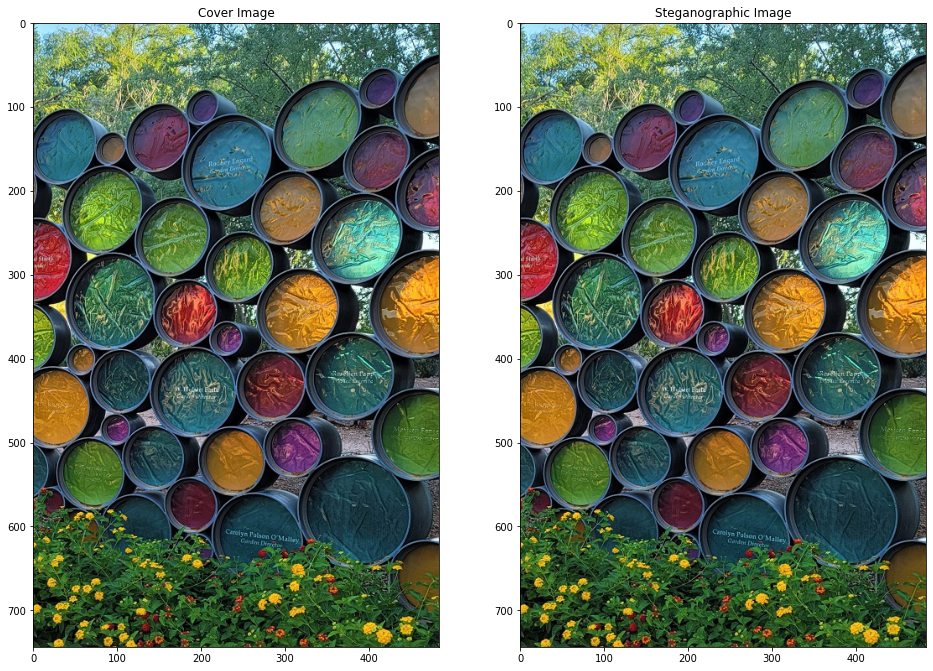

In [ ]:
fig = plt.figure(figsize=(16, 16))

fig.add_subplot(1, 2, 1)
plt.imshow(glass)
plt.title("Cover Image")

fig.add_subplot(1, 2, 2)
plt.imshow(glass_LSB)
plt.title("Steganographic Image")

Decrypt secret message from Steganographic Image 

In [ ]:
print(LSB_decrypt(glass_LSB, key))

Vanderbilt University


# F5
F5 Image Steganography algorithm is a transform domain technique based on matrix encoding of the secret message. The algorithm produces a new shuffling key based off of the orginal inputted key that generates the pseudo-random Discrete Cosine Transform (DCT) coefficients used in the encoding process. F5 relies on shuffling to achieve Permutation Straddling which scatters the image changes of secret message all throughout. The quantized DCT coefficients are based on Huffman's lossless data compression algorithm to transform the brightness values into frequency coefficients.

A transform domain method is characterized by the transformation of the spatial domain to the frequency domain used for the embedding of the hidden message. 

$$\text{ F5 Encryption}$$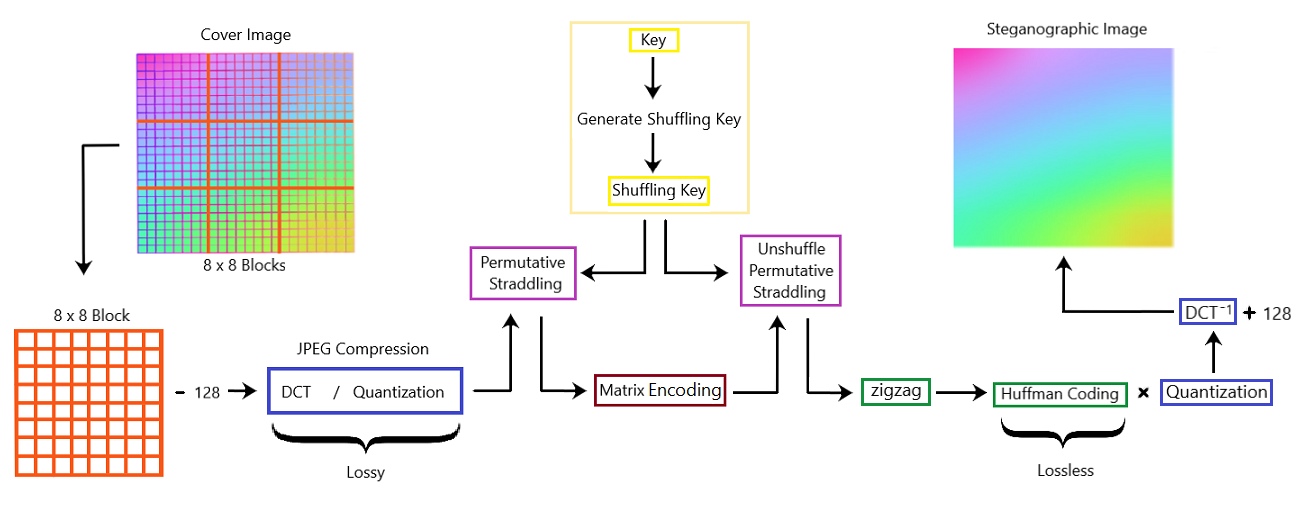

$$\text{ F5 Decryption}$$

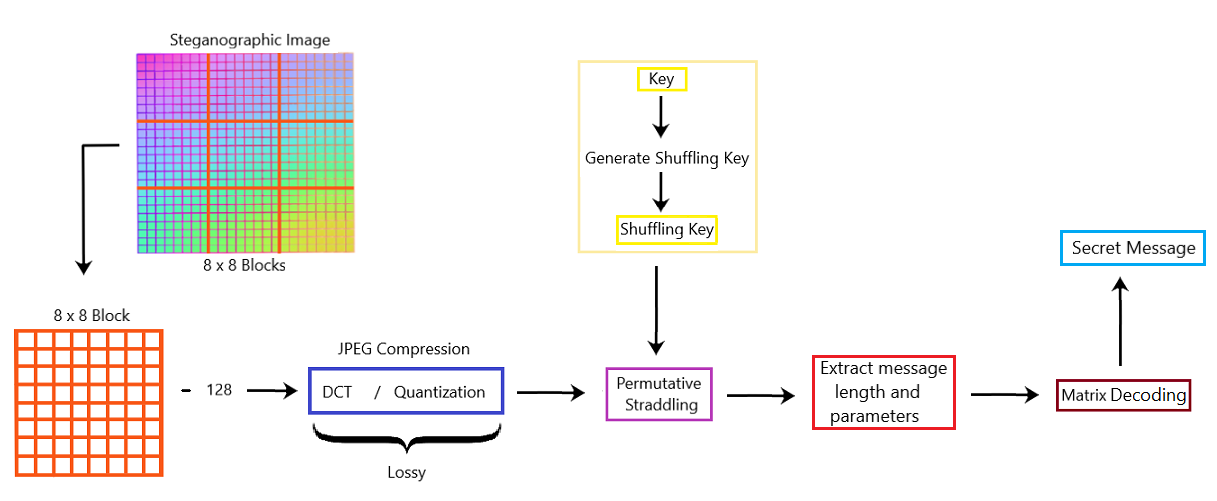

**DCT - Discrete Cosine Transform**

$$f^k(u,v) = \dfrac{1}{4}α(u)α(v)\sum\limits_{x = 0}^{7}\sum\limits_{y = 0}^{7}F^k_{x,y}cos\left[\dfrac{uπ(2x + 1 )}{16}\right]cos\left[\dfrac{vπ(2y + 1 )}{16}\right] 
$$


**DCT$^{-1}$ - Inverse Discrete Cosine Transform**

$$F^k(x,y) = \dfrac{1}{4}\sum\limits_{u = 0}^{7}\sum\limits_{v = 0}^{7}α(u)α(v)f^k_{u,v}cos\left[\dfrac{uπ(2x + 1 )}{16}\right]cos\left[\dfrac{vπ(2y + 1 )}{16}\right]  
\text{where } α(u) = \begin{cases} 
\dfrac{1}{\sqrt{8}} \text{ if } u = 0\\
 1 \text{ otherwise}
 \end{cases}$$

* _k_ denotes the kth block
*  $\alpha(u)$ denotes the normalizing scale factor to prevent shrinkage
*  _u_ denotes spatial frequency row 
*  _v_ denotes spatial frequency column 
*  _i_ denotes pixel row 
*  _j_ denotes pixel column 
*  $f^k(u,v)$ denotes the DCT coefficient 
*  $F^k(i,j)$ denotes the pixel value in the 8x8 cover image block



In [71]:
def DCT(block): 
  dct2 = [[0 for x in range(8)] for y in range(8)]
  for u in range(8):
      for v in range(8):
          sum = 0
          for x in range(8):
              for y in range(8):
                  dct1 = block[x][y] * math.cos((u * math.pi * (2 * x + 1))/16) * math.cos((v * math.pi * (2 * y + 1))/16)
                  sum += dct1
          alpha_u = 1 / (math.sqrt(8)) if u == 0 else 0.5
          alpha_v = 1 / (math.sqrt(8)) if v == 0 else 0.5
          dct2[u][v] = alpha_u * alpha_v * sum
  return dct2

In [100]:
def DCTinverse(block):
  dct2 = [[0 for x in range(8)] for y in range(8)]
  for u in range(8):
      for v in range(8):
          sum = 0
          alpha_u = 1 / (math.sqrt(8)) if u == 0 else 0.5
          alpha_v = 1 / (math.sqrt(8)) if v == 0 else 0.5
          for x in range(8):
              for y in range(8):
                  dct1 = block[x][y] * math.cos((u * math.pi * (2 * x + 1))/16) * math.cos((v * math.pi * (2 * y + 1))/16)
                  sum += alpha_u * alpha_v * dct1
          dct2[u][v] = sum
  return dct2

In [101]:
stegano1 = np.array([[52,	55,	61,	66,	70,	61,	64,	73],
                   [63,	59,	55,	90,	109,	85,	69,	72],
                   [62,	59,	68,	113,	144,	104,	66,	72],
                   [63,	58,	71,	122,	154,	106,	70,	69],
                   [67,	61,	68,	104,	126,	88,68,70],
                   [79,	65,	60,	70,	77,	68,58,75],
                   [85,	71,	64,	59,	55, 61,65,83],
                   [87,	79,	69,	68,	65, 76,78,94]])
s = stegano1 - 128
d = DCT(s)

id = DCTinverse(d)
print(id + np.array(128))
from scipy.fftpack import idct
print(idct(idct(np.array(d).T, norm = 'ortho').T, norm = 'ortho') + 128)


[[  58.36848594  -65.44071838  -35.63397639   -7.50170649   22.226521
    27.77459413   60.07046911  111.378496  ]
 [ -44.09808735 -351.5816517  -341.57486208 -174.22313895  -32.30320301
  -111.04907096  -90.5374636    47.80477582]
 [ -17.59578159 -285.05000337 -253.53023708  -29.38264408  141.73268251
   -57.04502625 -153.42790446   27.03751145]
 [   4.64096167 -240.2589571  -185.98715133   24.91910536  169.81126204
   -40.90611903 -138.18224395   25.77693314]
 [  28.04323769 -181.06636602 -173.27777864  -64.14450699   22.90108326
   -55.52592841  -36.45890919   70.84639928]
 [  61.03079102 -103.91684361 -166.56614727 -183.65513168 -168.44061192
   -32.01863224   52.47046926  150.37474747]
 [  90.29666122   -7.41968632  -61.58917221 -115.07919902 -137.69242018
    32.55775923  133.26404879  168.00809439]
 [ 111.14301244   92.30293523   65.42623858   51.1355086    46.15601365
   122.86990613  150.53019756  150.57233983]]
[[ 52.  55.  61.  66.  70.  61.  64.  73.]
 [ 63.  59.  55.  90. 

**Quantization Matrix**


The quantization matrix is designed to provide more resolution to more perceivable frequency components over less perceivable components (usually lower frequencies over high frequencies) in addition to transforming as many components to 0

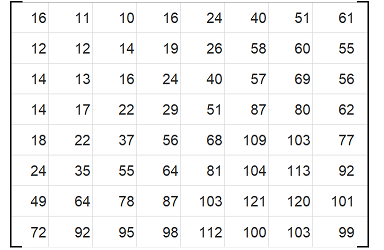

In [92]:
 Q = [[16,	11,	10,	16,	24,	40,	51,	61],
      [12,	12,	14,	19,	26,	58,	60,	55],
      [14,	13,	16,	24,	40,	57,	69,	56],
      [14,	17,	22,	29,	51,	87,	80,	62],
      [18,	22,	37,	56,	68,	109,103,77],
      [24,	35,	55,	64,	81,	104,113,92],
      [49,	64,	78,	87,	103, 121,120,101],
      [72,	92,	95,	98,	112, 100,103,99]]

**Permutative Straddling**

Permutative Straddling uniformly spreads out the pixel bits that get changed through out the entire steganographic image. The positions are based off the key in which will prepare the block for the encoding algorithm. Upon completion of the encoding, the block will be unshuffled to its original positions.




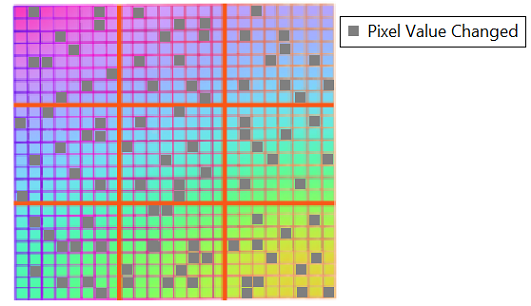

Shuffle DCT coefficients according to the shufflingKey
> **Input:**     
block - 8 by 8 block of DCT coefficients     
shufflingKey - list of integers from 0 to 63 representing index path

> **Output:**    
shuffledBlock - 8 by 8 block with shuffled DCT coefficients

In [221]:
def permutativeStraddling(block, shufflingKey):
  block = block.flatten()
  shuffledBlock = [0] * 64
  for i in range(64):
    idx = shufflingKey[i]
    shuffledBlock[idx] = block[i]
  return np.array(shuffledBlock).reshape((8,8))

UnShuffle DCT coefficients according to the shufflingKey
> **Input:**     
block - 8 by 8 block with shuffled DCT coefficients 
shufflingKey - list of integers from 0 to 63 representing index path

> **Output:**    
unShuffledBlock - 8 by 8 block of DCT coefficients    

In [226]:
def unShufflePermutativeStraddling(block, shufflingKey):
  block = block.flatten()
  unShuffledBlock = [0] * 64
  for i in range(64):
    idx = shufflingKey[i]
    unShuffledBlock[i] = block[idx]
  return np.array(unShuffledBlock).reshape((8,8))

**Matrix Encoding**

3-bit cells are subject to exclusive or with 2 bits of the message at a time. This will produce the least amount of change to the altered bits.

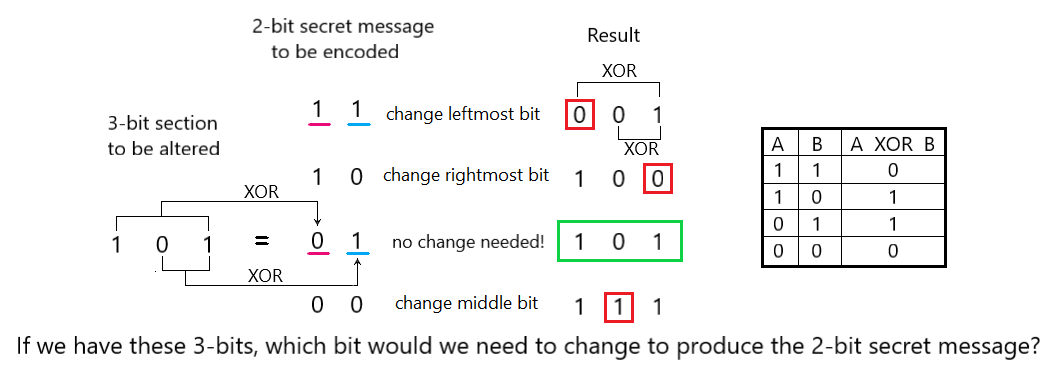

In [5]:
def matrixEncoding(d, n ,k, image):
  pass

**Huffman Coding**

Variable-length coding




Zigzag travesal   

The DCT block will be subject to the zigzag traversal pattern in order to be fed into the huffman encoder. 

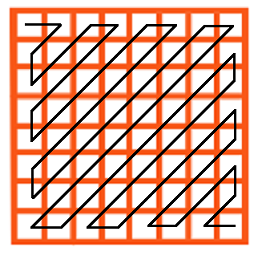

The DCT coefficient blocks will be ordered in a zigzag fashion into a one dimensional array.
> **Input:**         
block - DCT coefficent matrix 

> **Output:**    
zigzag - array of zigzagged ordered coefficients

In [27]:
def zigzag(block):
  order = [[] for i in range(15)]
  zigzag = []
  for i in range(8):
      for j in range(8):
          sum = i + j
          if(sum % 2 == 0): # add at beginning
              order[sum].insert(0, block[i][j])
          else: # add at end of the list
              order[sum].append(block[i][j])
  for row in order:
    zigzag += row
  return np.array(zigzag)

## Helper Functions

Creates a list of key-based random integers representing the index ordering to serve as the shuffling key
> **Input:**         
key - String or integer value

> **Output:**    
shuffledKey - list of integers ranging from 0 to 63 inclusive

In [209]:
def shufflingKey(key):
  random.seed(key)
  idx = list(range(1, 64))
  shuffledKey = [0]
  for i in range(1, 64):
    num = random.choice(idx)
    idx.remove(num)
    shuffledKey.append(num)
  return shuffledKey

Pads given image with duplicate neighboring pixel values in order for the number of rows and columns to be truly divisable by 8 
> **Input:**       
image - Image

> **Output:**    
image - Padded Image

In [7]:
def padImage(image):
  heightRem = image.shape[0] % 8 
  widthRem = image.shape[1] % 8
  if heightRem != 0:
    image += image[-(8 - heightRem):, :, :]
  if widthRem != 0: 
    image += image[:,-(8 - widthRem):, :]
  return image

## Encryption

Embed secret message in the given image using the F5 method
> **Input:**     
secret - String   
cover - Image  
key - String or integer value

> **Output:**    
stegano - F5 Steganographic Image 

In [ ]:
def F5_encrypt(secret, cover, key):
  shufflingKey = shufflingKey(key)
  secret =  msgToBinary(secret)
  stegano = padImage(cover)
  stegano -= 128

  #data vars for matrix encoding
  coeffCounts = {"AC_0s" : 0, "AC_abs_1s" : 0, "DC_coeffs" : 0}

  for i in range(1, len(stegano.shape[0])//8 + 2):
    for j in range(1, len(stegano.shape[0])//8 + 2):
      for rgb in range(3):
        startRow = (i - 1) * 8
        endRow = (i * 8) - 1
        startCol = (j - 1) * 8
        endCol = (j * 8) - 1

        block = stegano[startRow:endRow, startCol:endCol, rgb]
        coeffs = DCT(block)
 
        # numpy.divide, numpy.floor_divide, np.divide(coeffs,Q).astype(int) DO NOT produce the correct values
        quantized = [[0 for x in range(8)] for y in range(8)]
        for j in range(8):
          for k in range(8):
            qCoeff = round(coeffs[j][k] / Q[j][k])
            quantized[j][k] = qCoeff

            if qCoeff == 0:
              coeffCounts["AC_0s"] += 1
            elif abs(qCoeff) == 1:
              coeffCounts["AC_abs_1s"] += 1
            else:
              coeffCounts["DC_coeffs"] += 1

        shuffledCoeffs = permutativeStraddling(quantized, shufflingKey)
        
        stegano[startRow:endRow, startCol:endCol, rgb] = shuffledCoeffs
  
  # parameters to determine best matrix embedding
  capacity = 64 - (coeffCounts["DC_coeffs"]/64) - coeffCounts["AC_0s"] - (-0.51 * coeffCounts["AC_abs_1s"])
  len(secret)
  # used to determing k 
  k = 
  n = 2**k - 1
  #Matrix encoding 
  matrixEncoding(1, n , k, stegano)

  for i in range(1, len(stegano.shape[0])//8 + 2):
    for j in range(1, len(stegano.shape[0])//8 + 2):
      for rgb in range(3):
        startRow = (i - 1) * 8
        endRow = (i * 8) - 1
        startCol = (j - 1) * 8
        endCol = (j * 8) - 1

        block = stegano[startRow:endRow, startCol:endCol, rgb]
        unShuffledCoeffs = unShufflePermutativeStraddling(block, shufflingKey)
        
        zigzagged = zigzag(unShuffledCoeffs)
        huffman = [] # huffman function
        quantized = np.array(huffman) * Q
        iDCT = DCTinverse(quantized)
        stegano[startRow:endRow, startCol:endCol, rgb] = iDCT
         
    stegano += 128
  
  return stegano

In [186]:
############### TESTING
stegano1 = np.array([[52,	55,	61,	66,	70,	61,	64,	73],
                   [63,	59,	55,	90,	109,	85,	69,	72],
                   [62,	59,	68,	113,	144,	104,	66,	72],
                   [63,	58,	71,	122,	154,	106,	70,	69],
                   [67,	61,	68,	104,	126,	88,68,70],
                   [79,	65,	60,	70,	77,	68,58,75],
                   [85,	71,	64,	59,	55, 61,65,83],
                   [87,	79,	69,	68,	65, 76,78,94]])
stegano1 -= 128
stegano = np.array([[-66,	-73,	-73,	-74,	-79,	-80,	-81,	-73],
                   [-66,	-71,	-74,	-76,	-80,	-81,	-80,	-75],
                   [-67,	-68,	-76,	-79,	-80,	-81,	-79,	-74],
                   [-65,	-67,	-68,	-68,	-65,	-63,	-60,	-63],
                   [-61,	-61,	-58,	-54,	-49,	-43,-37,-36],
                   [-46,	-33,	-27,	-22,	-14,	-13,-16,-11],
                   [-32,	-17,	-13,	-9,	0, 0,2,-1],
                   [-19,	-7,	-1,	5,	11, 13,12,5]])

coeffs = DCT(stegano1)
print("DCT: ",coeffs)
# print("DCT1: ",DCT1(stegano))
# print("DCT2: ",DCT2(stegano))
r = [[0 for x in range(8)] for y in range(8)]
for i in range(8):
  for j in range(8):
    #print(coeffs[i][j], " / ", Q[i][j])
    r[i][j] = round(coeffs[i][j] / Q[i][j])
for i in r:

  print(i)
# print(np.array(coeffs))
quantization = np.divide(coeffs, Q).astype(int)  
print("QUANT: ",quantization)

#shuffledCoeffs = permutativeStraddling(quantization, shufflingKey)
#Matrix encoding 

DCT:  [[-415.4999999999999, -30.012337296143766, -61.36038232090526, 27.38630694630694, 55.999999999999964, -19.996961902536448, -2.455296607811834, 0.49630286485883424], [4.367311831615342, -21.72121555556589, -60.88635810832384, 10.36912175998175, 13.046898250677842, -7.010253436890838, -8.588588593892448, 4.903985090595999], [-46.76683522979419, 7.276764784047229, 77.21777592640385, -24.641529661019177, -28.84403891680239, 9.880369071852133, 5.453427124746224, -5.667615320650055], [-48.36158668486579, 11.82787599845529, 34.326299034303275, -14.963284370014161, -10.067226821085171, 6.159743661679063, 1.924997622475197, 1.8981010858191747], [12.249999999999952, -6.726829909557342, -13.032800600362322, -4.098412178210255, -1.7499999999999893, 1.6470725812283495, -2.7195787378186758, 3.1007948815664013], [-7.769231100009523, 2.953296811936192, 2.3347357760001444, -5.898761017262851, -2.4122841291429618, 0.9684881900569726, 4.285048885110163, 1.8582060843452117], [-1.1939943841067917, 0.

## Decryption

Retrieve secret message in the given F5 Steganograph image 
> **Input:**       
stegano - F5 Steganographic Image     
key -

> **Output:**    
secret - String or integer value

In [ ]:
def F5_decrypt():
  pass

## Visualization

### Image 1

Encrypt secret message in cover image 

In [ ]:
key = "0123456789012345"
secret_msg = "Fun fact: Every 39 seconds there is a cyber attack, 75% of cyber attacks start with an email, Since COVID-19 and the increase in staff working from home, the FBI have reported an increase of 300% in reported cybercrimes"

In [ ]:
hydrangea_F5 = F5_encrypt(secret_msg, hydrangea, key)

Cover image and Steganographic image visual comparison

In [ ]:
fig = plt.figure(figsize=(16, 16))

fig.add_subplot(1, 2, 1)
plt.imshow(hydrangea)
plt.title("Cover Image")

fig.add_subplot(1, 2, 2)
plt.imshow(hydrangea_F5)
plt.title("Steganographic Image")

Decrypt secret message from Steganographic Image 

In [ ]:
print(F5_decrypt(hydrangea_F5, key))

### Image 2

Encrypt secret message in cover image 

In [ ]:
key = "0123456789012345"
secret_msg = "Fun fact: Every 39 seconds there is a cyber attack, 75% of cyber attacks start with an email, Since COVID-19 and the increase in staff working from home, the FBI have reported an increase of 300% in reported cybercrimes"

In [ ]:
silo_F5 = F5_encrypt(secret_msg, silo, key)

Cover image and Steganographic image visual comparison

In [ ]:
fig = plt.figure(figsize=(16, 16))

fig.add_subplot(1, 2, 1)
plt.imshow(silo)
plt.title("Cover Image")

fig.add_subplot(1, 2, 2)
plt.imshow(silo_F5)
plt.title("Steganographic Image")

Decrypt secret message from Steganographic Image 

In [ ]:
print(F5_decrypt(silo_F5, key))

### Image 3

Encrypt secret message in cover image 

In [ ]:
key = "0123456789012345"
secret_msg = "Fun fact: Every 39 seconds there is a cyber attack, 75% of cyber attacks start with an email, Since COVID-19 and the increase in staff working from home, the FBI have reported an increase of 300% in reported cybercrimes"

In [ ]:
glass_F5 = F5_encrypt(secret_msg, glass, key)

Cover image and Steganographic image visual comparison

In [ ]:
fig = plt.figure(figsize=(16, 16))

fig.add_subplot(1, 2, 1)
plt.imshow(glass)
plt.title("Cover Image")

fig.add_subplot(1, 2, 2)
plt.imshow(glass_F5)
plt.title("Steganographic Image")

Decrypt secret message from Steganographic Image 

In [ ]:
print(glass_decrypt(glass_F5, key))

# Deep Learning 

## Encryption

## Decryption

## Visualization

### Image 1

### Image 2

### Image 3

# Image Steganography Technique Evaluation

### Image 1

### Image 2

### Image 3

# References

A. Soria-Lorente, S. Berres, "A Secure Steganographic Algorithm Based on Frequency Domain for the Transmission of Hidden Information", Security and Communication Networks, vol. 2017, Article ID 5397082, 14 pages, 2017. https://doi.org/10.1155/2017/5397082 

Amarendra, K. et al. “Image Steganography Using LSB.” International Journal of Scientific & Technology Research 8 (2019): 906-909.

Dhuriya, Ankur. “What Are DCT Coefficients and How JPEG Compression Works?” Medium, Analytics Vidhya, 1 July 2020, https://medium.com/analytics-vidhya/what-are-dct-coefficients-and-how-jpeg-compression-works-7f46d1e22b4c. 

Fridrich, Jessica, et al. “Steganalysis of JPEG Images: Breaking the F5 Algorithm.” Information Hiding, 2002, pp. 310–323., https://doi.org/10.1007/3-540-36415-3_20. 

Guzman, Anthony Rene (2022): Image Steganography Using Deep Learning Techniques. Purdue University Graduate School. Thesis. https://doi.org/10.25394/PGS.19666473.v1 

Hashim, Mohammed Mahdi et al. “Performance evaluation measurement of image steganography techniques with analysis of LSB based on variation image formats.” (2018).

Jain, Devang. “LSB Image Steganography Using Python.” Medium, The Startup, 8 Apr. 2021, https://medium.com/swlh/lsb-image-steganography-using-python-2bbbee2c69a2. 


  Liu, Jianyi, et al. “A Controllable Image Steganography with Chaos and User Key.” Image and Graphics, Springer International Publishing, 2021, pp. 785–97, https://doi.org/10.1007/978-3-030-87355-4_65.

Liu, J., Yang, C., Wang, J. et al. Stego key recovery method for F5 steganography with matrix encoding. J Image Video Proc. 2020, 40 (2020). https://doi.org/10.1186/s13640-020-00526-2

Reyes, Sh. “Performance Metrics for Image Steganography.” GeeksforGeeks, 28 Oct. 2021, https://www.geeksforgeeks.org/performance-metrics-for-image-steganography/. 

Verdier, Varden. “Discrete Cosine Transform.” SlideServe, 13 July 2014, https://www.slideserve.com/varden/discrete-cosine-transform. 

Wang, J., Yang, C., Zhu, M. et al. JPEG image steganography payload location based on optimal estimation of cover co-frequency sub-image. J Image Video Proc. 2021, 1 (2021). https://doi.org/10.1186/s13640-020-00542-2

Westfeld, Andreas. “F5—A Steganographic Algorithm: High Capacity Despite Better Steganalysis.” Information Hiding, Springer Berlin Heidelberg, 2001, pp. 289–302, https://doi.org/10.1007/3-540-45496-9_21.

